# In depth: drawing nodes

Here we show the fuctionalities and parameters of `xgi.draw_nodes()`.  It is similar to the [networkx](https://networkx.org/documentation/stable/reference/drawing.html) corresponding function (+ some bonus) and heavily relies on [matplotlib](https://matplotlib.org/)'s scatter function.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xgi

Les us first create a small toy hypergraph containing edges of different sizes.

In [2]:
edges = [[1, 2, 3], [3, 4, 5], [3, 6], [6, 7, 8, 9], [1, 4, 10, 11, 12], [1, 4]]

H = xgi.Hypergraph(edges)

pos = xgi.barycenter_spring_layout(H, seed=42) # fix position

(<Axes: >, <matplotlib.collections.PathCollection at 0x16b48e9d0>)

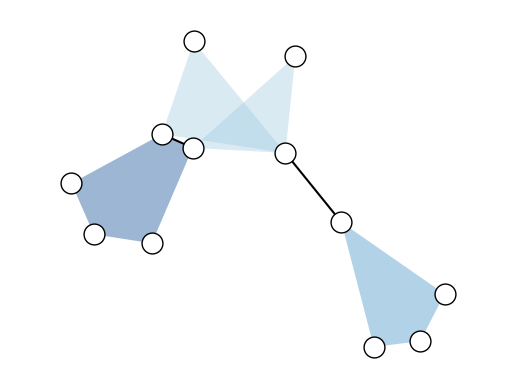

In [3]:
xgi.draw(H, pos)

## Basics

Let's jump right into how `xgi.draw_nodes()` works. By default, it gives:

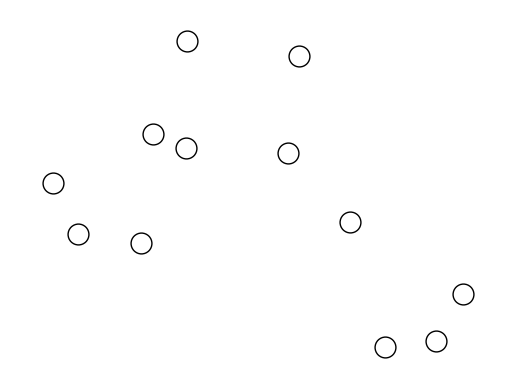

In [4]:
ax, node_collection = xgi.draw_nodes(H, pos)

Note that it returns a tuple `(Axes, PathCollection)`. The `PathCollection` is what matplotlib's `plt.scatter()` returns and can be used later to plot a colorbar.

The color, size, linewidth, and shape of the nodes can all be customised:

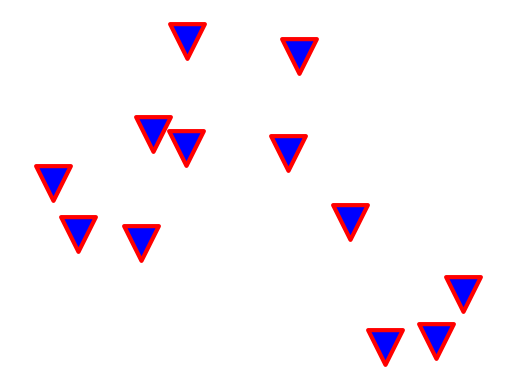

In [5]:
ax, node_collection = xgi.draw_nodes(
    H, pos, node_fc="b", node_ec="r", node_shape="v", node_size=25, node_lw=3
)

## Colormaps

In XGI, you can easily color nodes according to a NodeStat, or just an array or a dict:

{1: 3, 2: 1, 3: 3, 4: 3, 5: 1, 6: 2, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1}


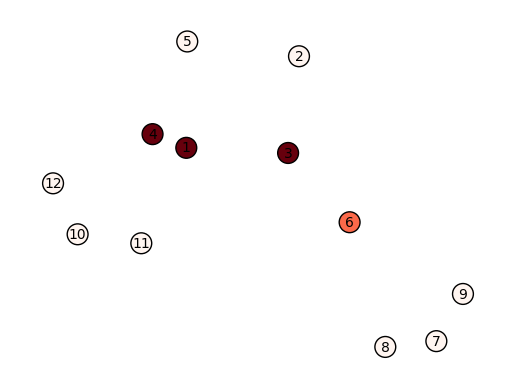

In [6]:
ax, node_collection = xgi.draw_nodes(H, pos, node_fc=H.nodes.degree(), node_labels=True)
print(H.nodes.degree().asdict())

By default, the colormap used is `"Reds"`. To visualise the values corresponding to the colors, nothing easier than plotting a colorbar:

{1: 3, 2: 1, 3: 3, 4: 3, 5: 1, 6: 2, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1}


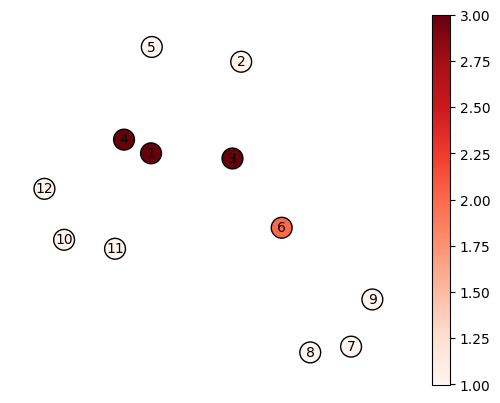

In [7]:
ax, node_collection = xgi.draw_nodes(H, pos, node_fc=H.nodes.degree(), node_labels=True)
print(H.nodes.degree().asdict())
plt.colorbar(node_collection)
plt.show()

You can specify a `vmin` and `vmax` for the node colors:

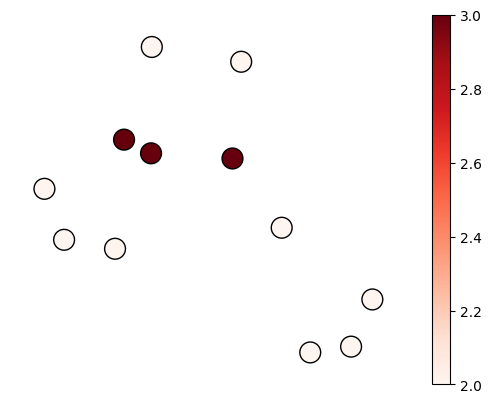

In [8]:
ax, node_collection = xgi.draw_nodes(H, pos, node_fc=H.nodes.degree(), vmin=2)
plt.colorbar(node_collection)
plt.show()

It's also easy to specify a different colormap:

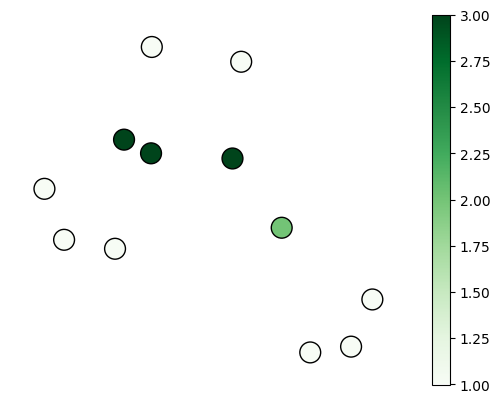

In [9]:
ax, node_collection = xgi.draw_nodes(H, pos, node_fc=H.nodes.degree(), node_fc_cmap="Greens")

plt.colorbar(node_collection)
plt.show()

And of course, all the colorbar customisation offered by matplotlib are available, for example:

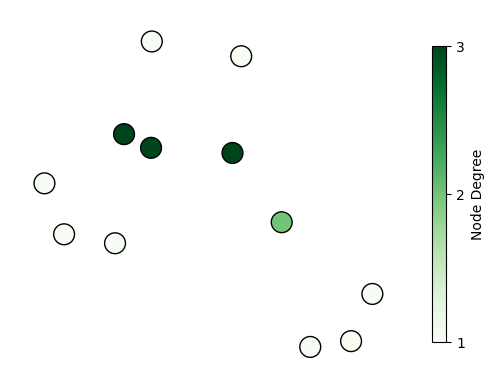

In [10]:
ax, node_collection = xgi.draw_nodes(H, pos, node_fc=H.nodes.degree(), node_fc_cmap="Greens")

plt.colorbar(node_collection, label="Node Degree", shrink=0.8, ticks=[1, 2, 3])

## Combine with edges

This can be either via `xgi.draw()`:

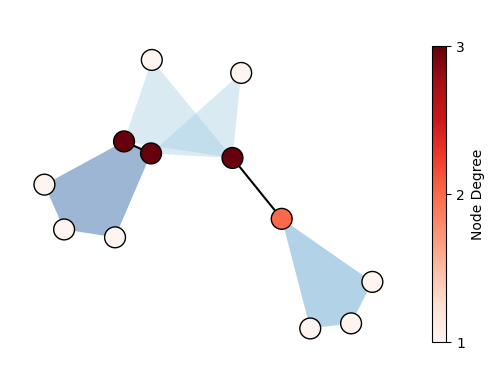

In [11]:
ax, node_collection = xgi.draw(H, pos=pos, node_fc=H.nodes.degree())

plt.colorbar(node_collection, label="Node Degree", shrink=0.8, ticks=[1, 2, 3])

Or by combining it with `xgi.hyperedges()` for more control:

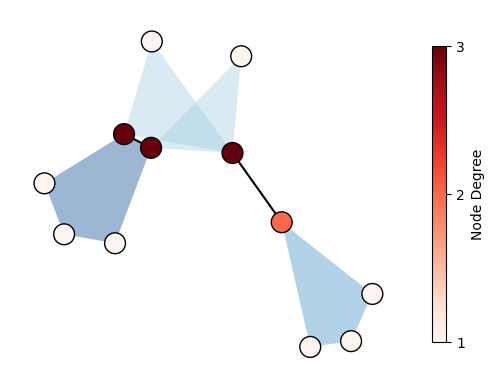

In [12]:
ax, node_collection = xgi.draw_nodes(H, pos=pos, node_fc=H.nodes.degree(), zorder=5)

ax = xgi.draw_hyperedges(H, pos=pos)

plt.colorbar(node_collection, label="Node Degree", shrink=0.8, ticks=[1, 2, 3])

Notice that here we had to specify the `zorder` of the nodes which is 0 by default in `xgi.draw_nodes()`!

## Non-finite values for node colors

By default, non-finite values (inf, nan) are plotted in the "bad" color of the cmap. Here, it is white by default:

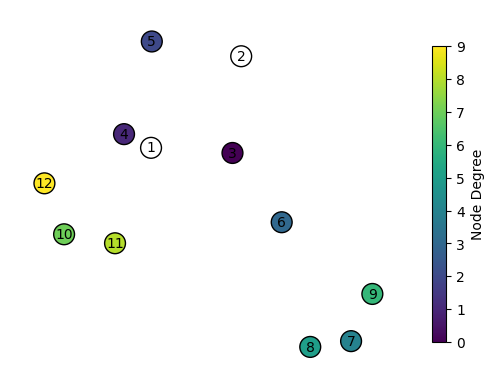

In [13]:
values = [np.inf, np.nan] + list(range(H.num_nodes-2)) # values for node colors

ax, node_collection = xgi.draw_nodes(H, pos, node_fc=values, node_fc_cmap="viridis", node_labels=True)

plt.colorbar(node_collection, label="Node Degree", shrink=0.8)
plt.show()

The default can be changed, for example here to red:

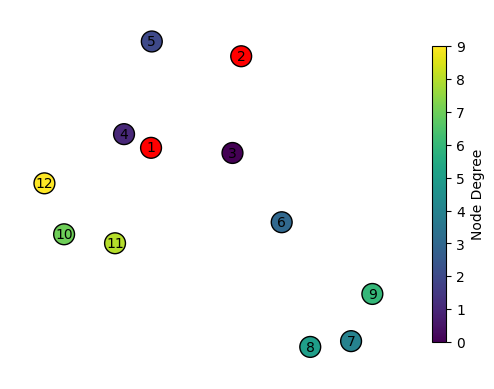

In [14]:
values = [np.inf, np.nan] + list(range(H.num_nodes-2))

cmap = plt.cm.viridis
cmap.set_bad("red") # set bad

ax, node_collection = xgi.draw_nodes(H, pos, node_fc=values, node_fc_cmap=cmap, node_labels=True)

plt.colorbar(node_collection, label="Node Degree", shrink=0.8)
plt.show()